In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("E:\\data science\\assiments\\14\\Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [4]:
data = pd.get_dummies(data, columns = ['Undergrad','Marital.Status','Urban'])

In [5]:
data.head()

,City.Population,Work.Experience,Taxable.Income,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,68833,1,0,0,0,1,0,1
1,134075,18,33700,0,1,1,0,0,0,1
2,160205,30,36925,1,0,0,1,0,0,1
3,193264,15,50190,0,1,0,0,1,0,1
4,27533,28,81002,1,0,0,1,0,1,0


In [6]:
#data['Taxable.Income']='Good'

In [7]:
data["TaxableIncome"]="good"
data.loc[data["Taxable.Income"]<= 30000,"TaxableIncome"]="risk"
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [8]:
data

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,TaxableIncome
0,50047,10,1,0,0,0,1,0,1,good
1,134075,18,0,1,1,0,0,0,1,good
2,160205,30,1,0,0,1,0,0,1,good
3,193264,15,0,1,0,0,1,0,1,good
4,27533,28,1,0,0,1,0,1,0,good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,good
596,55369,2,0,1,1,0,0,0,1,good
597,154058,0,1,0,1,0,0,0,1,good
598,180083,17,0,1,0,1,0,1,0,good


In [9]:
x = data.iloc[:,0:9]
y = data.iloc[:,9]

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify = y)

In [11]:
y_train.value_counts()

good    381
risk     99
Name: TaxableIncome, dtype: int64

## Building Decision Tree Classifier using Entropy Criteria¶

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

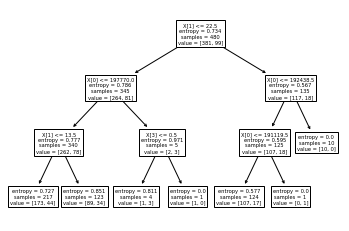

In [13]:
tree.plot_tree(model);

In [14]:
data.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES', 'TaxableIncome'],
      dtype='object')

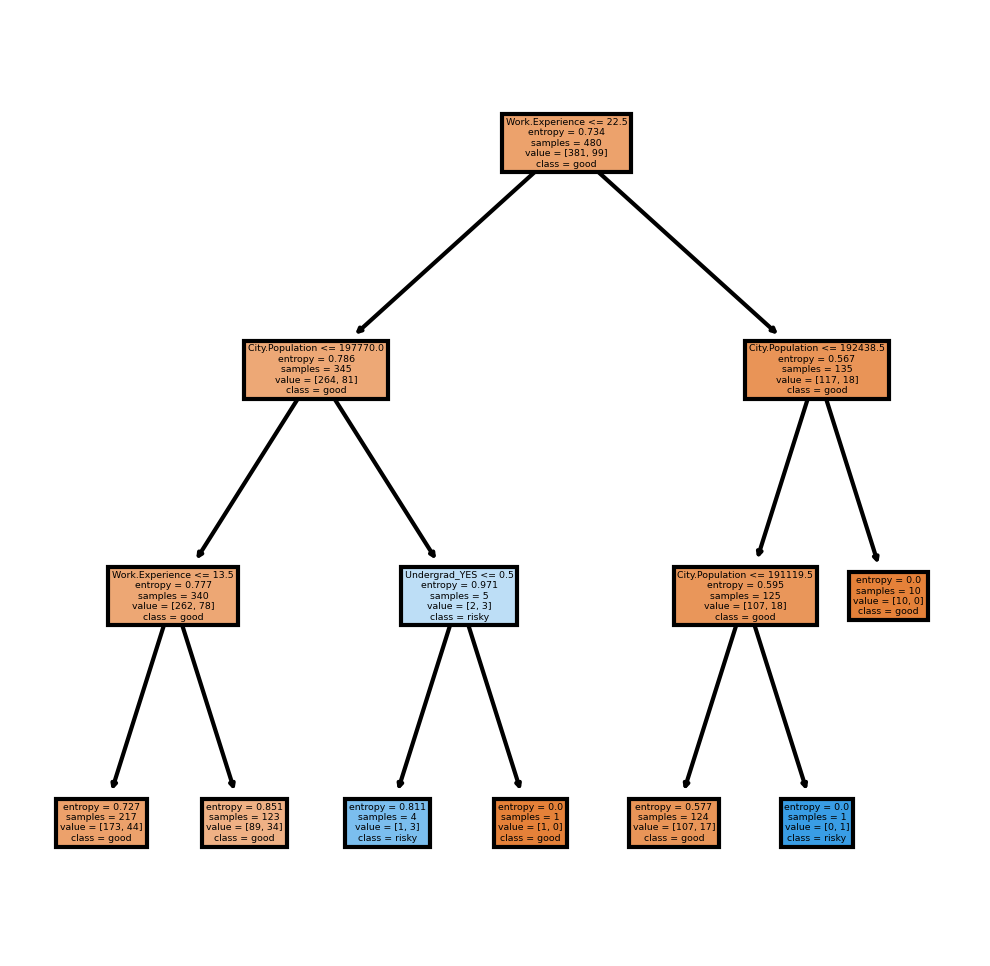

In [15]:
fn=['City.Population', 'Work.Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES',]
cn=['good','risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [16]:
pred_train = model.predict(x_train)

In [17]:
accuracy_score(y_train,pred_train)

0.8

In [18]:
pred_test = model.predict(x_test)

In [19]:
accuracy_score(y_test,pred_test)

0.7916666666666666

In [20]:
confusion_matrix(y_test,pred_test)

array([[95,  0],
       [25,  0]], dtype=int64)

## Building Decision Tree Classifier (CART) using Gini Criteria

In [21]:
model2 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

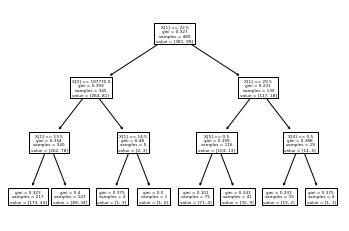

In [23]:
tree.plot_tree(model2);

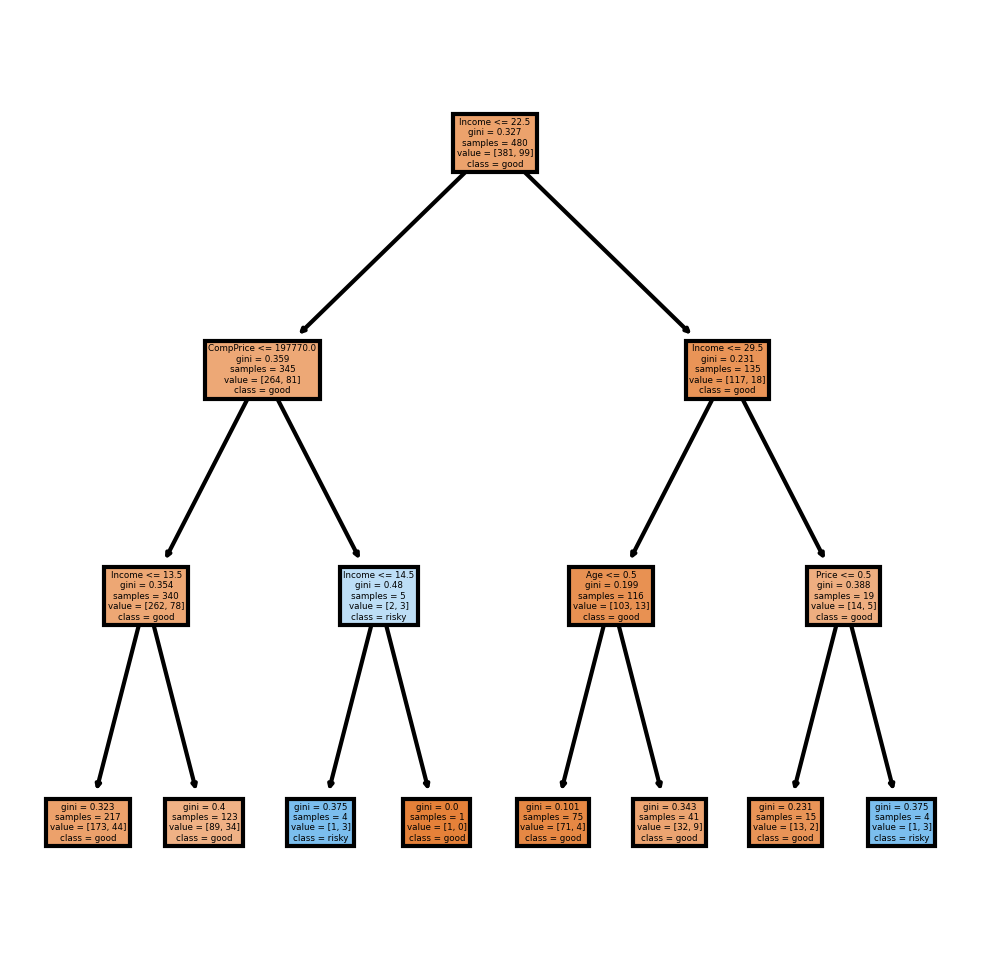

In [30]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes',]
cn=['good','risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [25]:
pred_train_gini = model2.predict(x_train)

In [26]:
accuracy_score(y_train,pred_train_gini)

0.8020833333333334

In [27]:
pred_test_gini = model2.predict(x_test)

In [28]:
accuracy_score(y_test,pred_test_gini)

0.7666666666666667

In [29]:
confusion_matrix(y_test,pred_test_gini)

array([[92,  3],
       [25,  0]], dtype=int64)